In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
with open ('data.txt','r') as file:
    weights =[int(line.strip().split(" ")[-1]) for line in file]
    min_weight= min(weights)
    max_weight= max(weights)



print(f"minimum weight : {min_weight}")
print(f"maximim  weight : {max_weight}")

minimum weight : 100
maximim  weight : 10000


In [3]:
with open ('data.txt','r') as file:
    for line in file : 
        a,b, w =  map(float, line.strip().split(" "))
        # Normalize the weight
        if max_weight != min_weight:
            w = (w - min_weight) / (max_weight - min_weight)
        else:
            w = 0.0  # If all weights are the same, the normalized weight is 0
       
        #w = (w - min_weight)/(max_weight - min_weight)
        G.add_edge(a,b, weight = w)

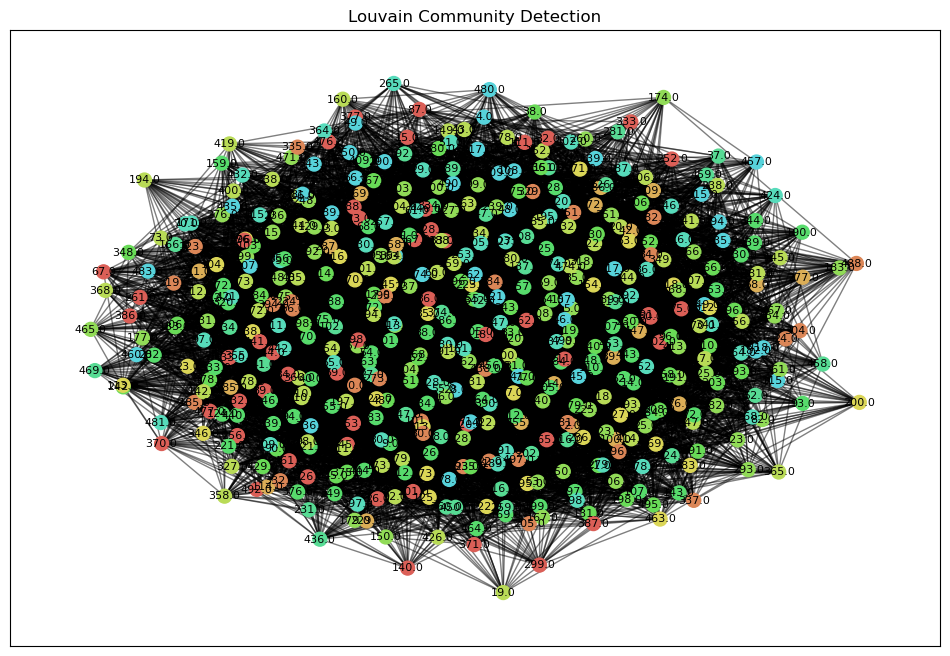

Modularity: 0.1560


In [16]:

import seaborn as sns
import matplotlib.pyplot as plt
# Generate a layout for the graph
pos = nx.spring_layout(G, seed=42)

import community as community_louvain  # Make sure the python-louvain package is installed

# Define the colors for communities
colors = sns.color_palette("hls", 20).as_hex()  # 20 different colors



# Detect communities using Louvain method
lst_b = community_louvain.best_partition(G)
communities = list(set(lst_b.values()))  # Unique community ids

# Create a color map for the nodes
color_map_b = {node: colors[lst_b[node] % len(colors)] for node in G.nodes()}

# Draw edges, nodes, and labels with assigned colors
plt.figure(figsize=(12, 8))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=list(color_map_b.values()), node_size=100)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")
plt.title("Louvain Community Detection")
plt.show()

# Calculate and print the modularity
modularity = community_louvain.modularity(lst_b, G, weight='weight')
print(f"Modularity: {modularity:.4f}")


In [30]:
k=5
# Calculate centrality measures for each community
community_centrality = {}

for community_id in set(lst_b.values()):
    # Extract the subgraph for the community
    subgraph = G.subgraph([node for node in G.nodes() if lst_b[node] == community_id])
    
    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(subgraph)
    betweenness_centrality = nx.betweenness_centrality(subgraph, weight='weight')
    closeness_centrality = nx.closeness_centrality(subgraph)
    
    # Store the results in the dictionary
    community_centrality[community_id] = {
        'degree_centrality': degree_centrality,
        'betweenness_centrality': betweenness_centrality,
        'closeness_centrality': closeness_centrality
    }

    # Print top 5 businesses based on each centrality measure
    print(f"\nCommunity {community_id} - Key Businesses:")
    print(f"\nCommunity {community_id} - Key Businesses:")
    print(f"Top {k} by Degree Centrality:", sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:k])
    print(f"Top {k} by Betweenness Centrality:", sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:k])
    print(f"Top {k} by Closeness Centrality:", sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:k])
    print("Yes")



Community 0 - Key Businesses:
Top {k} by Degree Centrality: [44.0, 128.0, 36.0, 120.0, 18.0]
Top 5 by Betweenness Centrality: [44.0, 36.0, 128.0, 120.0, 32.0]
Top 5 by Closeness Centrality: [44.0, 128.0, 36.0, 120.0, 461.0]
Yes

Community 1 - Key Businesses:
Top {k} by Degree Centrality: [295.0, 205.0, 381.0, 273.0, 22.0]
Top 5 by Betweenness Centrality: [295.0, 224.0, 329.0, 22.0, 332.0]
Top 5 by Closeness Centrality: [295.0, 224.0, 329.0, 332.0, 337.0]
Yes

Community 2 - Key Businesses:
Top {k} by Degree Centrality: [214.0, 100.0, 285.0, 447.0, 269.0]
Top 5 by Betweenness Centrality: [100.0, 214.0, 447.0, 372.0, 285.0]
Top 5 by Closeness Centrality: [214.0, 100.0, 447.0, 285.0, 42.0]
Yes

Community 3 - Key Businesses:
Top {k} by Degree Centrality: [312.0, 445.0, 63.0, 369.0, 118.0]
Top 5 by Betweenness Centrality: [369.0, 35.0, 312.0, 118.0, 445.0]
Top 5 by Closeness Centrality: [312.0, 445.0, 63.0, 118.0, 369.0]
Yes

Community 4 - Key Businesses:
Top {k} by Degree Centrality: [378.

In [29]:

# Set K (number of top businesses to examine per community)
K = 5
anomalies = []

# Iterate over each community to identify top K businesses
for community_id in set(lst_b.values()):
    # Extract the subgraph for the community
    subgraph = G.subgraph([node for node in G.nodes() if lst_b[node] == community_id])
    
    # Calculate degree centrality for simplicity, but can use any centrality measure
    centrality = nx.degree_centrality(subgraph)
    top_k_businesses = sorted(centrality, key=centrality.get, reverse=True)[:K]
    
    print(f"\nCommunity {community_id} - Top {K} Businesses: {top_k_businesses}")
    
    # Check transactions of top K businesses
    for business in top_k_businesses:
        neighbors = G.neighbors(business)
        for neighbor in neighbors:
            if lst_b[business] != lst_b[neighbor]:  # Check if neighbor is outside the community
                weight = G[business][neighbor]['weight']
                print(f"Transaction from {business} to {neighbor} with weight {weight}")
                
                # Define your anomaly detection criteria, e.g., unusually large transaction
                if weight > 0.8:  # This threshold should be based on your analysis
                    print(f"Anomaly Detected: Business {business} transacting {weight} with {neighbor}")
                    anomalies.append((business, neighbor, weight))

print(f"\nTotal Anomalies Detected: {len(anomalies)}")


Community 0 - Top 5 Businesses: [44.0, 128.0, 36.0, 120.0, 18.0]
Transaction from 44.0 to 121.0 with weight 0.5515151515151515
Transaction from 44.0 to 212.0 with weight 0.8696969696969697
Anomaly Detected: Business 44.0 transacting 0.8696969696969697 with 212.0
Transaction from 44.0 to 397.0 with weight 0.5767676767676768
Transaction from 44.0 to 402.0 with weight 0.692929292929293
Transaction from 44.0 to 376.0 with weight 0.7474747474747475
Transaction from 44.0 to 327.0 with weight 0.7555555555555555
Transaction from 44.0 to 422.0 with weight 0.8787878787878788
Anomaly Detected: Business 44.0 transacting 0.8787878787878788 with 422.0
Transaction from 44.0 to 25.0 with weight 0.806060606060606
Anomaly Detected: Business 44.0 transacting 0.806060606060606 with 25.0
Transaction from 44.0 to 374.0 with weight 0.7232323232323232
Transaction from 44.0 to 383.0 with weight 0.5040404040404041
Transaction from 44.0 to 237.0 with weight 0.8393939393939394
Anomaly Detected: Business 44.0 tra

NameError: name 'yes' is not defined

In [27]:
# Example: Excluding low-weight edges
min_weight_threshold = 0.1  # Experiment with this threshold
edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < min_weight_threshold]
G.remove_edges_from(edges_to_remove)

# Re-detect communities
new_communities = community_louvain.best_partition(G)

# Re-evaluate modularity
new_modularity_score = community_louvain.modularity(new_communities, G)
print(f"New Modularity Score after adjustments: {new_modularity_score}")


New Modularity Score after adjustments: 0.19811765656847893
